# Final Project

## Breast Cancer Detection

[Applied Machine Learning CS-3840](https://pilot.wright.edu/d2l/lms/dropbox/user/folder_submit_files.d2l?ou=624767&db=358827)

[Matthew Slusser](https://github.com/Sluss12/Applied-Machine-Learning-CS3840-01/tree/master/final-project)

---
## Table of Contents

* [Table of Contents](#table-of-contents)
* [Dataset](#data-set)
    * [Dataset Info](#display-basic-information-about-the-dataset)
    * [Histograms](#plot-dataset-on-histograms)
    * [Preprocess Dataset](#preprocess-data-and-separate-the-data-frame-into-features-and-labels)
* [Visualizations](#data-visualizations)
    * [Swarm Plots](#swarm-plots)
        * [Mean Features](#mean-features)
        * [SE Features](#se-features)
        * [Worst Features](#worst-features)
    * [Correlation Map](#correlation-map)
        * [Mean Features Correlation](#mean-features-correlation-map)
        * [SE Features Correlation](#se-features-correlation-map)
        * [Worst Features Correlation](#worst-features-correlation-map)
* [Models](#begin-training-various-models)
    * [Logistic Regression](#logistic-regression)
    * [KNN](#k-nearest-neighbors)
    * [SVM](#support-vector-machine)
    * [Random Forest](#random-forest)
    * [Bagging](#bagging)
    * [AdaBoost](#adaboost)
* [Results](#results)
* [Discussion](#discussion)
* [Challenges](#challenges)
* [Conclusion](#conclusion)


---

## Data Set:
[Breast Cancer Diagnostic Prediction Dataset](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data)


In [75]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time as time
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier # for random forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

#Please place breast_cancer_data.csv and your notebook/python file in the same directory; otherwise, change DATA_PATH 
DATA_PATH = ""

def load_breast_cancer_data(breast_cancer_data_path=DATA_PATH):
    csv_path = os.path.join(breast_cancer_data_path, "data.csv")
    return pd.read_csv(csv_path)

breast_cancer_data = load_breast_cancer_data()

### Display Basic Information about the dataset

In [76]:
print(breast_cancer_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

### Plot dataset on histograms

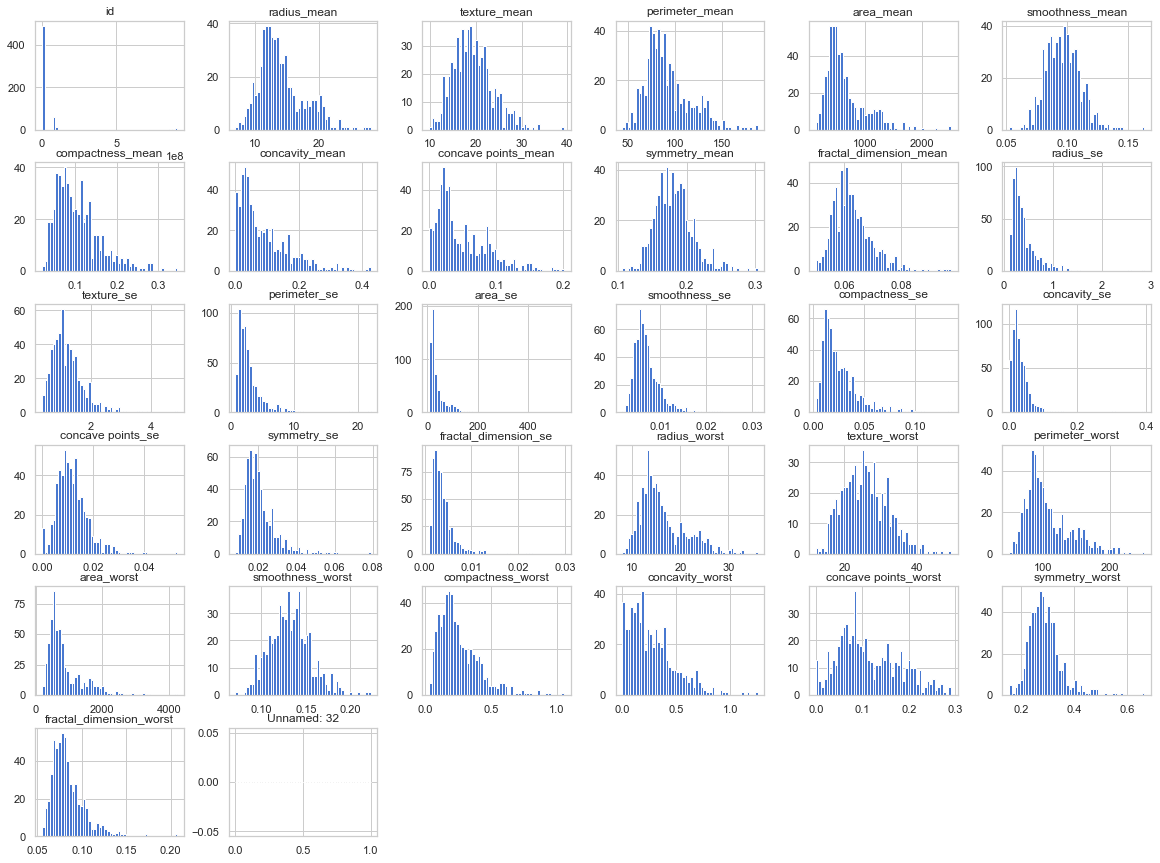

In [77]:
breast_cancer_data.hist(bins=50, figsize=(20,15))
plt.show()

In [78]:
# Show a correlation matrix of data when correlated to the `diagnosis` variable
#dropped_features = ['Unnamed: 32','id']
#corr_matrix = breast_cancer_data.drop(dropped_features, axis=1)
#corr_matrix = corr_matrix.corr()
# print(corr_matrix["diagnosis"].sort_values(ascending=False))

### Preprocess data and separate the data frame into features and labels

In [79]:

#Divide the data frame into features and labels
cancer_labels = breast_cancer_data[["diagnosis"]] # use diagnosis as classification label
dropped_features = ['Unnamed: 32','id','diagnosis']
cancer_features = breast_cancer_data.drop(dropped_features, axis=1) # use columns other than diagnosis as features
print(cancer_features.describe())
print(cancer_labels["diagnosis"].value_counts())
ordinal_encoder = OrdinalEncoder()
cancer_labels_encoded = ordinal_encoder.fit_transform(cancer_labels)
y_binary = cancer_labels_encoded # maligent or beniend 

# Scale the features
std_scaler = StandardScaler()
cancer_features_scaled = std_scaler.fit_transform(cancer_features)

# Final cancer features - X
X = cancer_features_scaled # features have been scaled and now represented by X

# Create a separate feature set to work with
drop_list1 = ['perimeter_mean','radius_mean','compactness_mean','concave points_mean','radius_se','perimeter_se','radius_worst','perimeter_worst','compactness_worst','concave points_worst','compactness_se','concave points_se','texture_worst','area_worst']
cancer_features_1 = cancer_features.drop(drop_list1,axis = 1 )        # do not modify x, we will use it later 
cancer_features_1.head()
cancer_features_scaled_1 = std_scaler.fit_transform(cancer_features_1)

# Data splits for binary classification
X_train, X_test, y_train, y_test = train_test_split(cancer_features_scaled_1, y_binary, test_size=0.25, random_state=42)


       radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%      

## Data visualizations

### Swarm Plots

In [80]:
features_mean= list(cancer_features.columns[0:10])
features_se= list(cancer_features.columns[11:20])
features_worst=list(cancer_features.columns[21:30])

#### Mean Features

C:\Users\sluss\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\categorical.py:1296: UserWarning: 5.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_mean'),
  Text(1, 0, 'texture_mean'),
  Text(2, 0, 'perimeter_mean'),
  Text(3, 0, 'area_mean'),
  Text(4, 0, 'smoothness_mean'),
  Text(5, 0, 'compactness_mean'),
  Text(6, 0, 'concavity_mean'),
  Text(7, 0, 'concave points_mean'),
  Text(8, 0, 'symmetry_mean'),
  Text(9, 0, 'fractal_dimension_mean')])

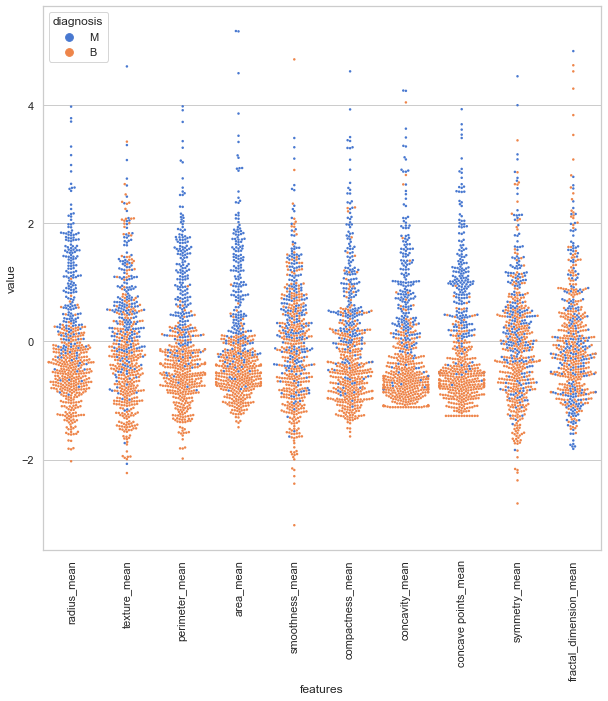

In [81]:
sns.set(style="whitegrid", palette="muted")
data_dia = cancer_labels
data = cancer_features
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([cancer_labels,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
tic = time.time()
sns.swarmplot(x="features", y="value", s=2.5 , hue="diagnosis", data=data)

plt.xticks(rotation=90)

#### SE Features

C:\Users\sluss\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\categorical.py:1296: UserWarning: 6.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\sluss\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\categorical.py:1296: UserWarning: 24.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_se'),
  Text(1, 0, 'texture_se'),
  Text(2, 0, 'perimeter_se'),
  Text(3, 0, 'area_se'),
  Text(4, 0, 'smoothness_se'),
  Text(5, 0, 'compactness_se'),
  Text(6, 0, 'concavity_se'),
  Text(7, 0, 'concave points_se'),
  Text(8, 0, 'symmetry_se'),
  Text(9, 0, 'fractal_dimension_se')])

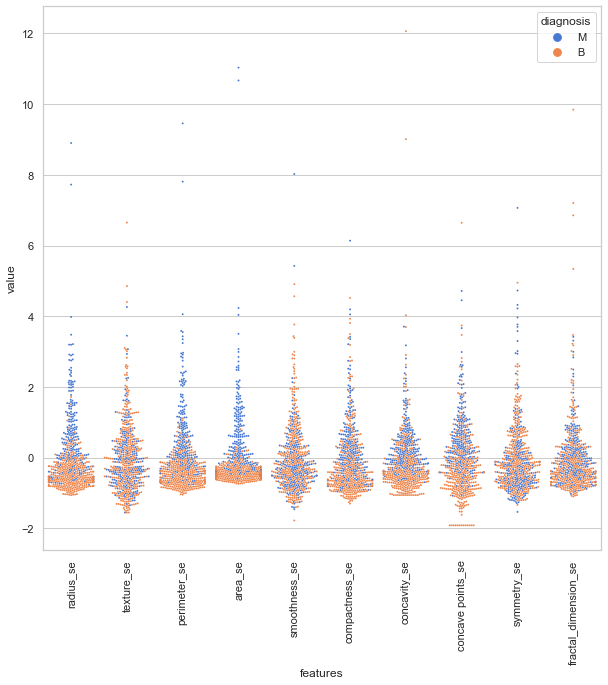

In [82]:
data = pd.concat([cancer_labels,data_n_2.iloc[:,10:20]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.swarmplot(x="features", y="value", s=1.9, hue="diagnosis", data=data)
plt.xticks(rotation=90)

#### Worst Features

C:\Users\sluss\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\categorical.py:1296: UserWarning: 12.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


swarm plot time:  6.007872581481934  s


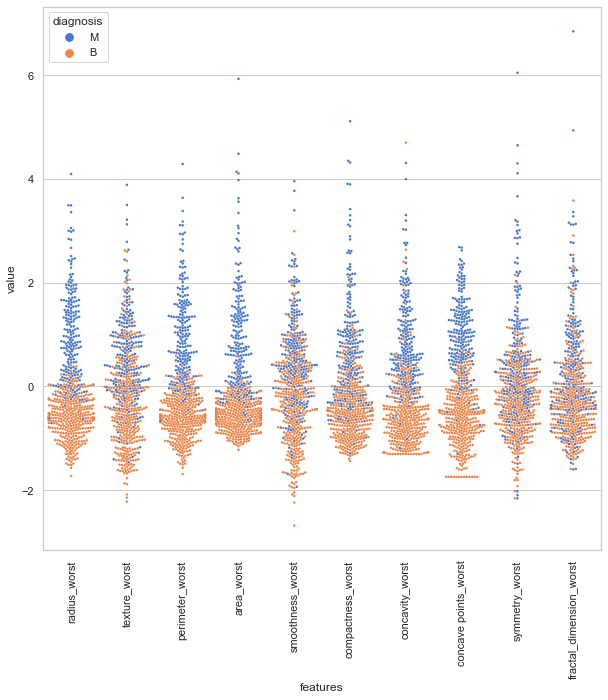

In [83]:
data = pd.concat([cancer_labels,data_n_2.iloc[:,20:31]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.swarmplot(x="features", y="value", s=2.5, hue="diagnosis", data=data)
toc = time.time()
plt.xticks(rotation=90)
print("swarm plot time: ", toc-tic ," s")

#### All Features Correlation Map

<AxesSubplot:>

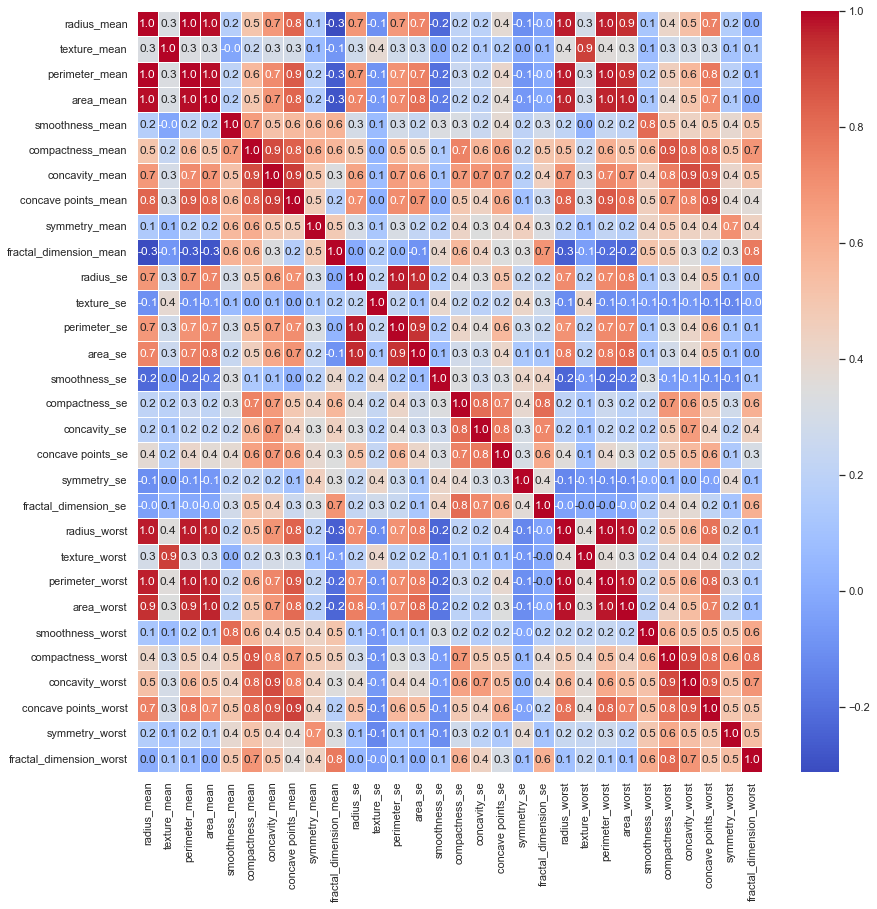

In [84]:
f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(cancer_features.corr(), annot=True, linewidths=.5, fmt= '.1f', ax=ax, cmap= 'coolwarm')

#### Mean Features Correlation Map

<AxesSubplot:>

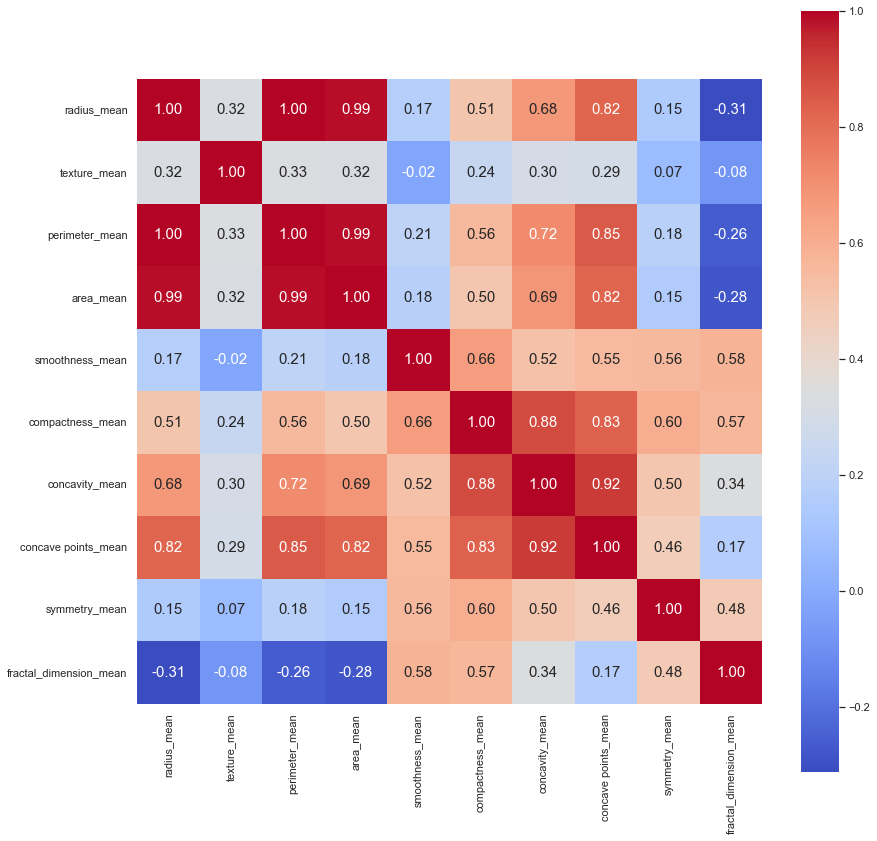

In [85]:
corr = cancer_features[features_mean].corr() # .corr is used for find corelation
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= features_mean, yticklabels= features_mean,
           cmap= 'coolwarm')

#### SE Features Correlation Map

<AxesSubplot:>

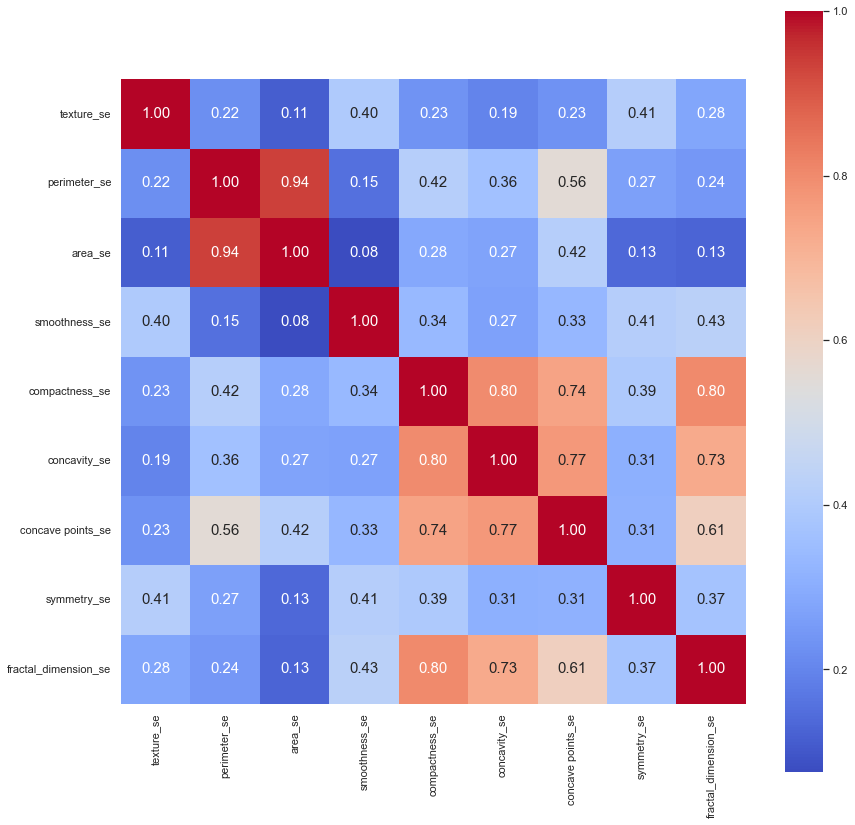

In [86]:
corr = cancer_features[features_se].corr() # .corr is used for find corelation
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= features_se, yticklabels= features_se,
           cmap= 'coolwarm')

#### Worst Features Correlation Map

<AxesSubplot:>

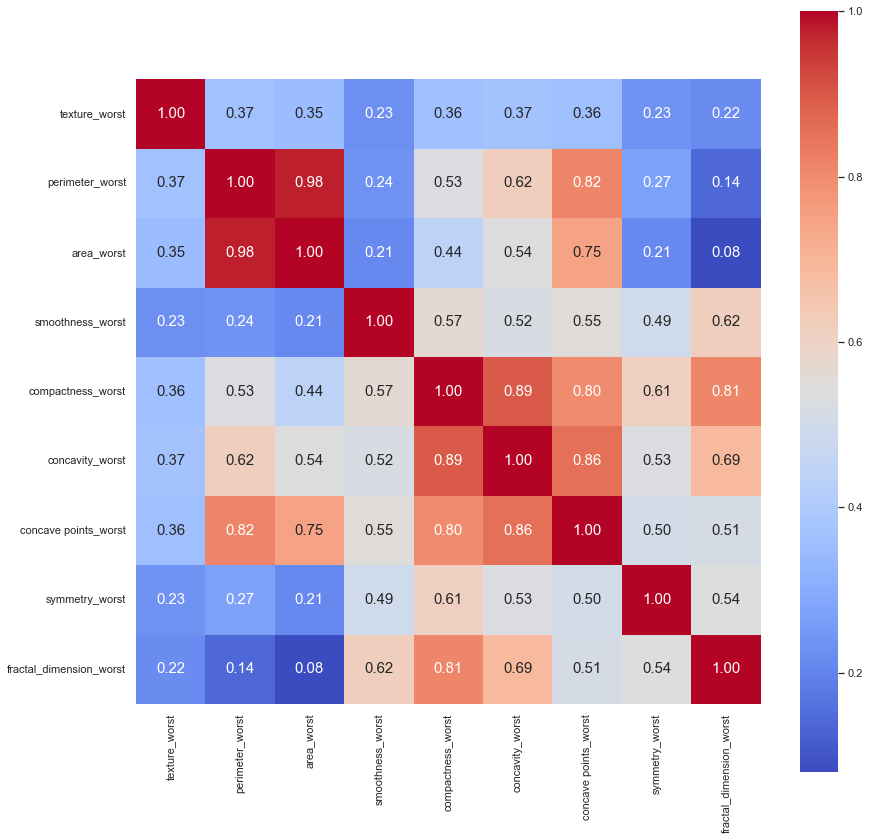

In [87]:
corr = cancer_features[features_worst].corr() # .corr is used for find corelation
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= features_worst, yticklabels= features_worst,
           cmap= 'coolwarm')

## Begin training various models

### Logistic Regression


Logistic Regression Accuracy: 0.9790
Logistic Regression F1-Score: 0.9725
Root Mean Square Error (RMSE): 0.1448
Mean Absolute Error (MAE): 0.0210
Logistic Regression Confusion Matrix: 


C:\Users\sluss\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<AxesSubplot:>

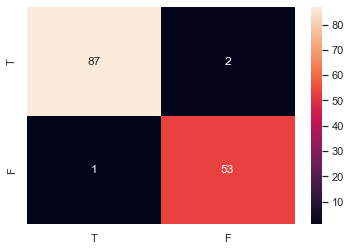

In [88]:
# Confusion Matrix label setup




#Logictic regression binary classification on X_train and y_train
binary_reg = LogisticRegression(solver="newton-cg", random_state=42)
binary_reg.fit(X_train, y_train)

#Prediction on X_test
y_pred = binary_reg.predict(X_test)

#Accuracy: use accuracy_score 
binary_reg_accuracy = accuracy_score(y_pred, y_test)
binary_reg_f1 = f1_score(y_test,y_pred, average='binary')

#Get mean square error using mean_squared_error with y_test and y_predict 
reg_mse = mean_squared_error(y_test, y_pred)
reg_rmse = np.sqrt(reg_mse)

#Please get mean absolute error using mean_absolute_error with y_test and y_predict
reg_mae = mean_absolute_error(y_test, y_pred)

print('Logistic Regression Accuracy: {:.4f}'.format(binary_reg_accuracy))
print('Logistic Regression F1-Score: {:.4f}'.format(binary_reg_f1))
print('Root Mean Square Error (RMSE): {:.4f}'.format(reg_rmse))
print('Mean Absolute Error (MAE): {:.4f}'.format(reg_mae))
print('Logistic Regression Confusion Matrix: ')
reg_cm = confusion_matrix(y_test,y_pred)
sns.heatmap(reg_cm,annot=True,xticklabels=['T','F'],yticklabels=['T','F'],fmt="d")

### K-Nearest Neighbors

K-nearest Neighbors Accuracy: 0.9231
K-nearest Neighbors F1-Score: 0.8972
Root Mean Square Error (RMSE): 0.2774
Mean Absolute Error (MAE): 0.0769
K-nearest Neighbors Confusion Matrix: 


C:\Users\sluss\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


<AxesSubplot:>

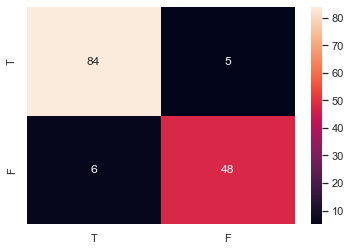

In [89]:
#k-nearest neighbors binary classification on X_train and y_train
n_neighbors=3
binary_knn = KNeighborsClassifier(n_neighbors)
binary_knn.fit(X_train, y_train)

#Prediction on X_test
y_pred = binary_knn.predict(X_test)

#Accuracy: use accuracy_score 
knn_accuracy = accuracy_score(y_test,y_pred)

#Get mean square error using mean_squared_error with y_test and y_predict 
knn_mse = mean_squared_error(y_test, y_pred)
knn_rmse = np.sqrt(knn_mse)

#Please get mean absolute error using mean_absolute_error with y_test and y_predict
knn_mae = mean_absolute_error(y_test, y_pred)

#F1 score: use f1_score with average='binary' 
knn_f1 = f1_score(y_test,y_pred, average='binary')

print('K-nearest Neighbors Accuracy: {:.4f}'.format(knn_accuracy))
print('K-nearest Neighbors F1-Score: {:.4f}'.format(knn_f1))
print('Root Mean Square Error (RMSE): {:.4f}'.format(knn_rmse))
print('Mean Absolute Error (MAE): {:.4f}'.format(knn_mae))
print('K-nearest Neighbors Confusion Matrix: ')
knn_cm = confusion_matrix(y_test,y_pred)
sns.heatmap(knn_cm,annot=True,xticklabels=['T','F'],yticklabels=['T','F'],fmt="d")

### Support Vector Machine

SVM Accuracy: 0.9720
SVM F1-Score: 0.9636
Micro F1-Score: 0.9720
Macro F1-Score: 0.9705
Root Mean Square Error (RMSE): 0.1672
Mean Absolute Error (MAE): 0.0280
SVM Confusion Matrix: 


C:\Users\sluss\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<AxesSubplot:>

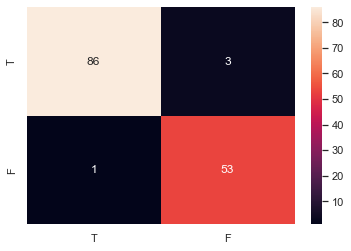

In [90]:
#Support vector machine binary classification on X_train and y_train
binary_svm = SVC(kernel='linear',random_state=42)
binary_svm.fit(X_train,y_train)

#Prediction on X_test
y_pred = binary_svm.predict(X_test)
#Accuracy: use accuracy_score 
svm_accuracy = accuracy_score(y_test, y_pred)

#F1 score: use f1_score with average='binary' 
svm_f1 = f1_score(y_test,y_pred, average='binary')
#Micro F1 score: use f1_score with average='micro' 
svm_microf1 = f1_score(y_test,y_pred, average='micro')
#Micro F1 score: use f1_score with average='macro' 
svm_macrof1 = f1_score(y_test,y_pred, average='macro')

#Get mean square error using mean_squared_error with y_test and y_predict 
svm_mse = mean_squared_error(y_test, y_pred)
svm_rmse = np.sqrt(svm_mse)

#Please get mean absolute error using mean_absolute_error with y_test and y_predict
svm_mae = mean_absolute_error(y_test, y_pred)

print('SVM Accuracy: {:.4f}'.format(svm_accuracy))
print('SVM F1-Score: {:.4f}'.format(svm_f1))
print('Micro F1-Score: {:.4f}'.format(svm_microf1))
print('Macro F1-Score: {:.4f}'.format(svm_macrof1))
print('Root Mean Square Error (RMSE): {:.4f}'.format(svm_rmse))
print('Mean Absolute Error (MAE): {:.4f}'.format(svm_mae))
print('SVM Confusion Matrix: ')
svm_cm = confusion_matrix(y_test,y_pred)
sns.heatmap(svm_cm,annot=True,xticklabels=['T','F'],yticklabels=['T','F'],fmt="d")

### Random Forest

C:\Users\sluss\AppData\Local\Temp\ipykernel_476184\4208397038.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_clf = rf_clf.fit(X_train,y_train)


Random Forest Accuracy: 0.9790
Random Forest F1-Score: 0.9725
Root Mean Square Error (RMSE): 0.1448
Mean Absolute Error (MAE): 0.0210
Random Forest Confusion Matrix: 


<AxesSubplot:>

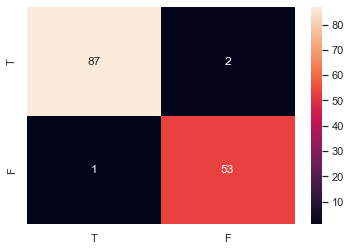

In [91]:
# random forest classifier with n_estimators=10 (default)
rf_clf = RandomForestClassifier( random_state=42)      
rf_clf = rf_clf.fit(X_train,y_train)

# Prediction on X_test
y_pred = rf_clf.predict(X_test)

# Accuracy: use accuracy_score 
rf_accuracy = accuracy_score(y_test, y_pred)
rf_f1 = f1_score(y_test,y_pred, average='binary')

#Get mean square error using mean_squared_error with y_test and y_predict 
rf_mse = mean_squared_error(y_test, y_pred)
rf_rmse = np.sqrt(rf_mse)

#Please get mean absolute error using mean_absolute_error with y_test and y_predict
rf_mae = mean_absolute_error(y_test, y_pred)

# Print results
print('Random Forest Accuracy: {:.4f}'.format(rf_accuracy))
print('Random Forest F1-Score: {:.4f}'.format(rf_f1))
print('Root Mean Square Error (RMSE): {:.4f}'.format(rf_rmse))
print('Mean Absolute Error (MAE): {:.4f}'.format(rf_mae))
print('Random Forest Confusion Matrix: ')
rf_cm = confusion_matrix(y_test,y_pred)
sns.heatmap(rf_cm,annot=True,xticklabels=['T','F'],yticklabels=['T','F'],fmt="d")

Accuracy is around 98% and as it can be seen in confusion matrix, we made only two wrong predictions. Which is very good but has me afraid of overfitting

### Bagging

C:\Users\sluss\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\ensemble\_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Random Forest Accuracy: 0.9580
Random Forest F1-Score: 0.9455
Root Mean Square Error (RMSE): 0.2048
Mean Absolute Error (MAE): 0.0420
Random Forest Confusion Matrix: 


<AxesSubplot:>

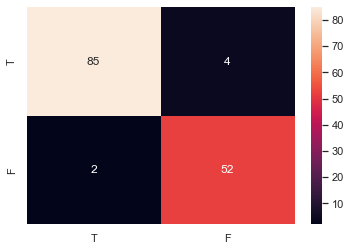

In [92]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    max_samples=100, bootstrap=True, random_state=42)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

# Accuracy: use accuracy_score 
bag_accuracy = accuracy_score(y_test, y_pred)
bag_f1 = f1_score(y_test,y_pred, average='binary')

#Get mean square error using mean_squared_error with y_test and y_predict 
bag_mse = mean_squared_error(y_test, y_pred)
bag_rmse = np.sqrt(bag_mse)

#Please get mean absolute error using mean_absolute_error with y_test and y_predict
bag_mae = mean_absolute_error(y_test, y_pred)

# Print results
print('Bagging Accuracy: {:.4f}'.format(bag_accuracy))
print('Bagging Forest F1-Score: {:.4f}'.format(bag_f1))
print('Root Mean Square Error (RMSE): {:.4f}'.format(bag_rmse))
print('Mean Absolute Error (MAE): {:.4f}'.format(bag_mae))
print('Random Forest Confusion Matrix: ')
bag_cm = confusion_matrix(y_test,y_pred)
sns.heatmap(bag_cm,annot=True,xticklabels=['T','F'],yticklabels=['T','F'],fmt="d")

### AdaBoost

C:\Users\sluss\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoost Accuracy: 0.9790
AdaBoost F1-Score: 0.9725
Root Mean Square Error (RMSE): 0.1448
Mean Absolute Error (MAE): 0.0210
AdaBoost Confusion Matrix: 


<AxesSubplot:>

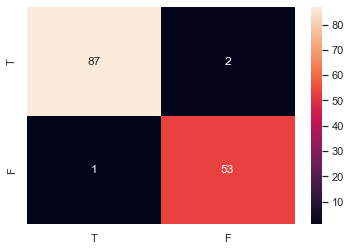

In [93]:
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=500,
    algorithm="SAMME.R", learning_rate=0.1, random_state=42)
ada_clf.fit(X_train, y_train)
y_pred = ada_clf.predict(X_test)

# Accuracy: use accuracy_score 
ada_accuracy = accuracy_score(y_test, y_pred)
ada_f1 = f1_score(y_test,y_pred, average='binary')

#Get mean square error using mean_squared_error with y_test and y_predict 
ada_mse = mean_squared_error(y_test, y_pred)
ada_rmse = np.sqrt(ada_mse)

#Please get mean absolute error using mean_absolute_error with y_test and y_predict
ada_mae = mean_absolute_error(y_test, y_pred)

# Print results
print('AdaBoost Accuracy: {:.4f}'.format(ada_accuracy))
print('AdaBoost F1-Score: {:.4f}'.format(ada_f1))
print('Root Mean Square Error (RMSE): {:.4f}'.format(ada_rmse))
print('Mean Absolute Error (MAE): {:.4f}'.format(ada_mae))
print('AdaBoost Confusion Matrix: ')
ada_cm = confusion_matrix(y_test,y_pred)
sns.heatmap(ada_cm,annot=True,xticklabels=['T','F'],yticklabels=['T','F'],fmt="d")

## Results

#### Logistic Regression
- Logistic Regression Accuracy: 0.9790
- Logistic Regression F1-Score: 0.9725
- Root Mean Square Error (RMSE): 0.1448
- Mean Absolute Error (MAE): 0.0210

#### K-Nearest Neighbors
- K-nearest Neighbors Accuracy: 0.9231
- K-nearest Neighbors F1-Score: 0.8972
- Root Mean Square Error (RMSE): 0.2774
- Mean Absolute Error (MAE): 0.0769

#### Support Vector Machine
- SVM Accuracy: 0.9720
- SVM F1-Score: 0.9636
- Micro F1-Score: 0.9720
- Macro F1-Score: 0.9705
- Root Mean Square Error (RMSE): 0.1672
- Mean Absolute Error (MAE): 0.0280

#### Random Forest
- Random Forest Accuracy: 0.9790
- Random Forest F1-Score: 0.9725
- Root Mean Square Error (RMSE): 0.1448
- Mean Absolute Error (MAE): 0.0210

#### Bagging
- Bagging Accuracy: 0.9580
- Bagging F1-Score: 0.9455
- Root Mean Square Error (RMSE): 0.2048
- Mean Absolute Error (MAE): 0.0420

#### adaBoost
- AdaBoost Accuracy: 0.9790
- AdaBoost F1-Score: 0.9725
- Root Mean Square Error (RMSE): 0.1448
- Mean Absolute Error (MAE): 0.0210


## Discussion

I was able to high 90s for every one of my models with only KNN dropping below 95% accuracy. adaBoost, Random Forest, SVM, and Logistic regression all shared nearly the same level of accuracy.

## Challenges

My biggest worry is overfitting and the size of my dataset which I looked to make bigger but could not find other datasets that were not image based. I did find a much larger image based dataset with around 10,000 total images in the dataset and around, [dataset for future work](https://www.kaggle.com/datasets/awsaf49/cbis-ddsm-breast-cancer-image-dataset).